#importing modules

In [37]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

loading dataset

In [38]:
df= pd.read_csv("Iris.csv")

In [39]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
#delete a Column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
#to display basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
#to display no of sample in each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

preprocessing dataset

In [46]:
#check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

EXPLORATORY DATA ANALYSIS

<Axes: >

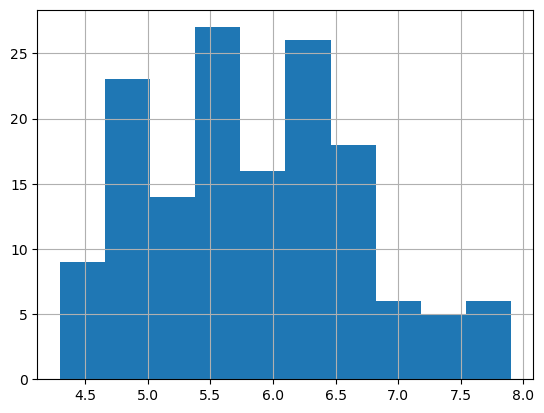

In [47]:
df['SepalLengthCm'].hist()

<Axes: >

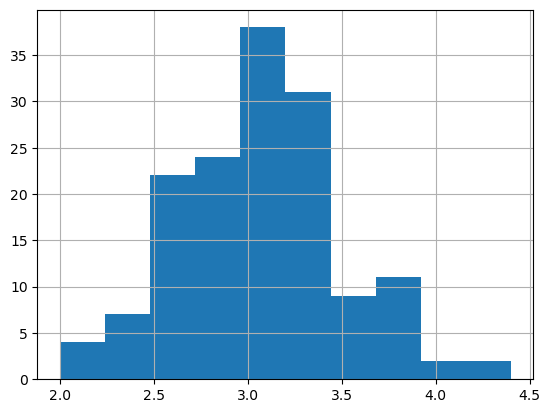

In [48]:
df['SepalWidthCm'].hist()

<Axes: >

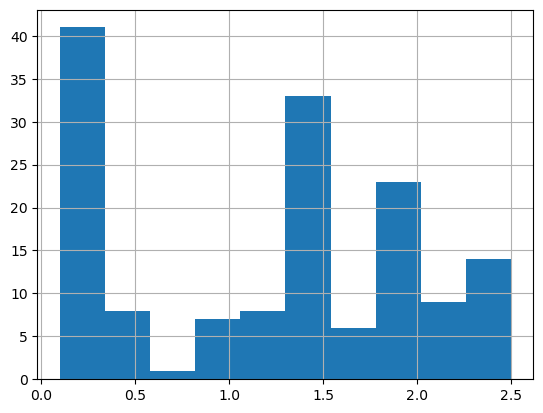

In [49]:
df['PetalWidthCm'].hist()

<Axes: >

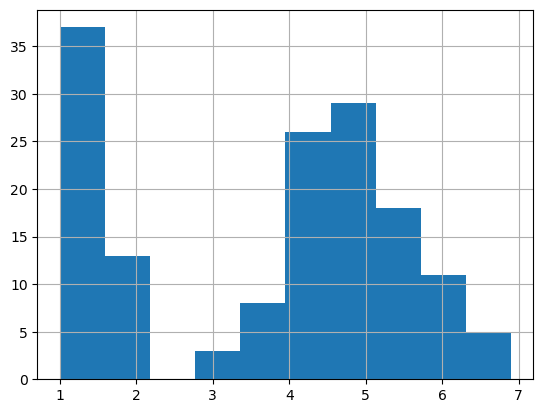

In [50]:
df['PetalLengthCm'].hist()

In [51]:
#scatterplot
colors =['red','orange','blue']
species =['Iris-setosa','Iris-versicolor','Iris-virginica']     

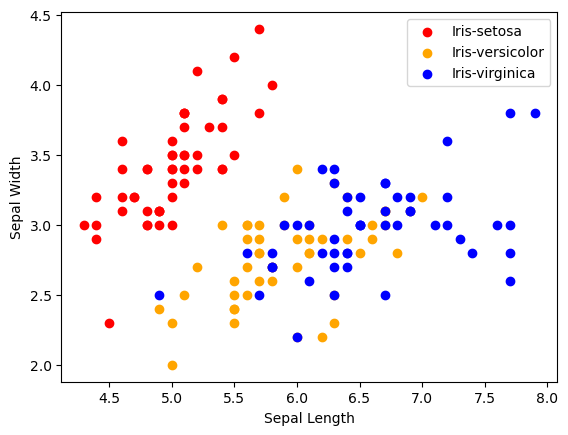

In [52]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])    
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()

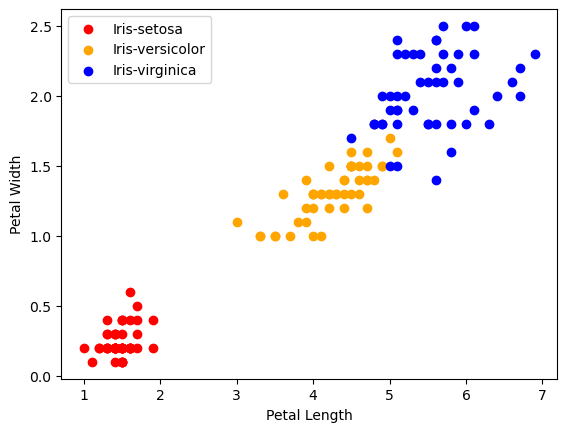

In [53]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])    
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend()

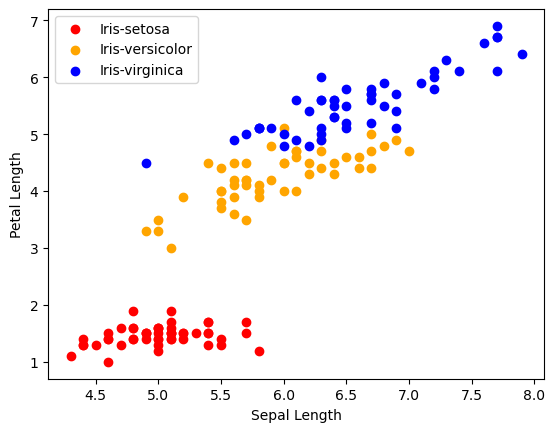

In [54]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])    
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.legend()

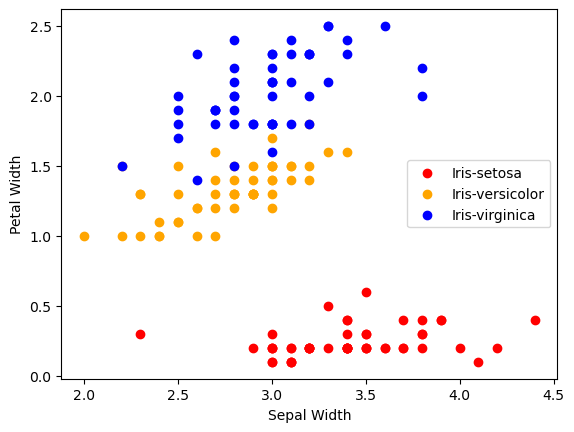

In [55]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])    
    plt.xlabel('Sepal Width')
    plt.ylabel('Petal Width')
    plt.legend()

Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.

In [56]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


<Axes: >

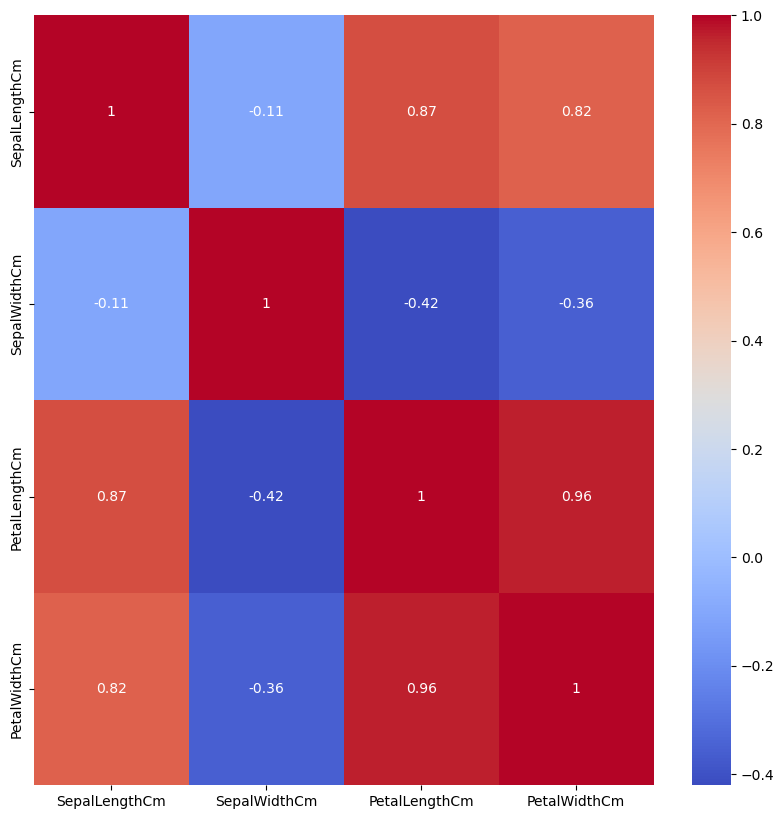

In [57]:
correlation_matrix = numeric_df.corr()
fig, ax  =plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, annot =True , ax=ax, cmap ="coolwarm")

Label Encoder

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


MODEL TRAINING

In [60]:
from sklearn.model_selection import train_test_split
#train - 70
#train - 30
X = df.drop(columns=['Species'])
Y =df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.30)

In [61]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [62]:
model.fit(x_train, y_train)

LogisticRegression()

In [63]:
#print metric to get performance
print("Accuracy: ", model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


Accuracy: 98%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



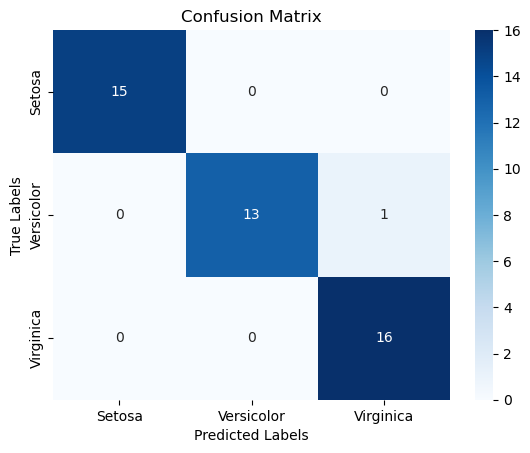

In [64]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `X_test` is your test dataset features and `y_test` is the true labels
# And `model` is the trained machine learning model

# Step 1: Make predictions
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Convert to percentage and round to nearest integer
accuracy_percent = round(accuracy * 100)

# Display the accuracy as a percentage
print(f"Accuracy: {accuracy_percent}%")

# Step 2: Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Step 3: Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



In [65]:
#knn - k-nearest neigbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [66]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [67]:
#print metric to get performance
print("Accuracy: ", model.score(x_test, y_test)*100)

Accuracy:  100.0


In [68]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Convert to percentage and round to nearest integer
accuracy_percent = round(accuracy * 100)

# Display the accuracy as a percentage
print(f"Accuracy: {accuracy_percent}%")

# Step 2: Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 98%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [69]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [70]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [71]:
#print metric to get performance
print("Accuracy: ", model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556


In [72]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Convert to percentage and round to nearest integer
accuracy_percent = round(accuracy * 100)

# Display the accuracy as a percentage
print(f"Accuracy: {accuracy_percent}%")

# Step 2: Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 98%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

